In [1]:
import pyreadr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tmp = pyreadr.read_r('University/ADS/fall2019-proj1--ftmhghpnh/output/processed_lyrics.RData')
dt_lyrics = tmp['dt_lyrics']

In [3]:
dt_lyrics

song    year            artist  \
0                     when-you-were-with-me  2009.0                 a   
1                          careless-whisper  2009.0                 a   
2                                      2-59  2007.0                 a   
3                           power-of-desire  2007.0                 a   
4                        you-re-not-in-love  2007.0                 a   
5                                   nothing  2007.0                 a   
6                                 bad-bitch  2013.0                 a   
7                                  stranger  2013.0                 a   
8                       better-off-with-him  2005.0                 a   
9                               die-tonight  2005.0                 a   
10                             someone-else  2005.0                 a   
11                              afterburner  2005.0                 a   
12                                rush-song  2005.0                 a   
13                                   wisdom  2005.0                 a   
14                                  wake-up  2005.0                 a   
15                               black-hole  2005.0                 a   
16                      art-of-making-sense  2005.0                 a   
17                               2nd-coming  2005.0                 a   
18              worst-thing-that-can-happen  2005.0                 a   
19                                      hey  2005.0                 a   
20                     the-living-daylights  2012.0                 a   
21                                     rock  2012.0                 a   
22                             took-it-away  2002.0                 a   
23                              the-springs  2002.0                 a   
24                       pacific-ocean-blue  2002.0                 a   
25                 6-o-clock-on-a-tube-stop  2002.0                 a   
26                            shut-yer-face  2002.0                 a   
27                                starbucks  2002.0                 a   
28                              w-d-y-c-a-i  2002.0                 a   
29                               going-down  2002.0                 a   
...                                     ...     ...               ...   
125674                   is-there-a-way-out  2006.0   the-get-up-kids   
125675                       never-be-alone  2006.0   the-get-up-kids   
125676                           holy-roman  2006.0   the-get-up-kids   
125677                          better-half  2006.0   the-get-up-kids   
125678                      fall-from-grace  2006.0   the-get-up-kids   
125679                           my-apology  2006.0   the-get-up-kids   
125680                          ten-minutes  2006.0   the-get-up-kids   
125681                  last-place-you-look  2006.0   the-get-up-kids   
125682                            valentine  2006.0   the-get-up-kids   
125683                 rally-round-the-fool  2011.0   the-get-up-kids   
125684                          rememorable  2011.0   the-get-up-kids   
125685                           better-lie  2011.0   the-get-up-kids   
125686                            automatic  2011.0   the-get-up-kids   
125687                       regent-s-court  2011.0   the-get-up-kids   
125688                                tithe  2011.0   the-get-up-kids   
125689                           keith-case  2011.0   the-get-up-kids   
125690                   shatter-your-lungs  2011.0   the-get-up-kids   
125691                         when-it-dies  2011.0   the-get-up-kids   
125692                 faith-or-forgiveness  2010.0  the-ghost-inside   
125693                             deceiver  2012.0  the-ghost-inside   
125694                            engine-45  2012.0  the-ghost-inside   
125695                    the-great-unknown  2012.0  the-ghost-inside   
125696                      test-the-limits  2012.0  the-ghost-inside   
125697  this-is-what-i-k

In [4]:
frames = []
for year in dt_lyrics.year.unique():
    tmp = pd.Series(' '.join(dt_lyrics[dt_lyrics.year == year].stemmedwords).split()).value_counts()[:30]
    tmp = {'Word': tmp.keys(), 'Count': tmp.values }
    tmp = pd.DataFrame(tmp)
    tmp['year'] = year
    frames.append(tmp)
yearly_word_count = pd.concat(frames)

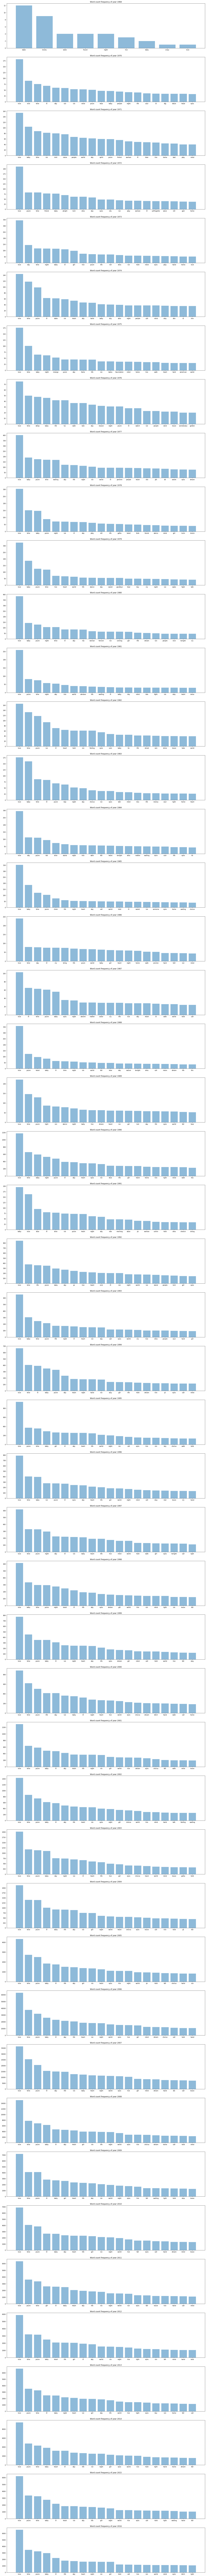

In [5]:
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 4)
fig.set_figheight(fig.get_figheight() * 80)
years = sorted(dt_lyrics.year.unique().tolist())[2:]
for idx, year in enumerate(years):
    tmp = pd.Series(' '.join(dt_lyrics[dt_lyrics.year == year].stemmedwords).split()).value_counts()[:20]
    plt.subplot(len(years), 1, idx + 1)
    y_pos = np.arange(len(tmp.keys()))
    plt.bar(y_pos, tmp.values, align='center', alpha=0.5)
    plt.xticks(y_pos, tmp.keys())
    plt.title('Word count frequency of year {}'.format(int(year)))

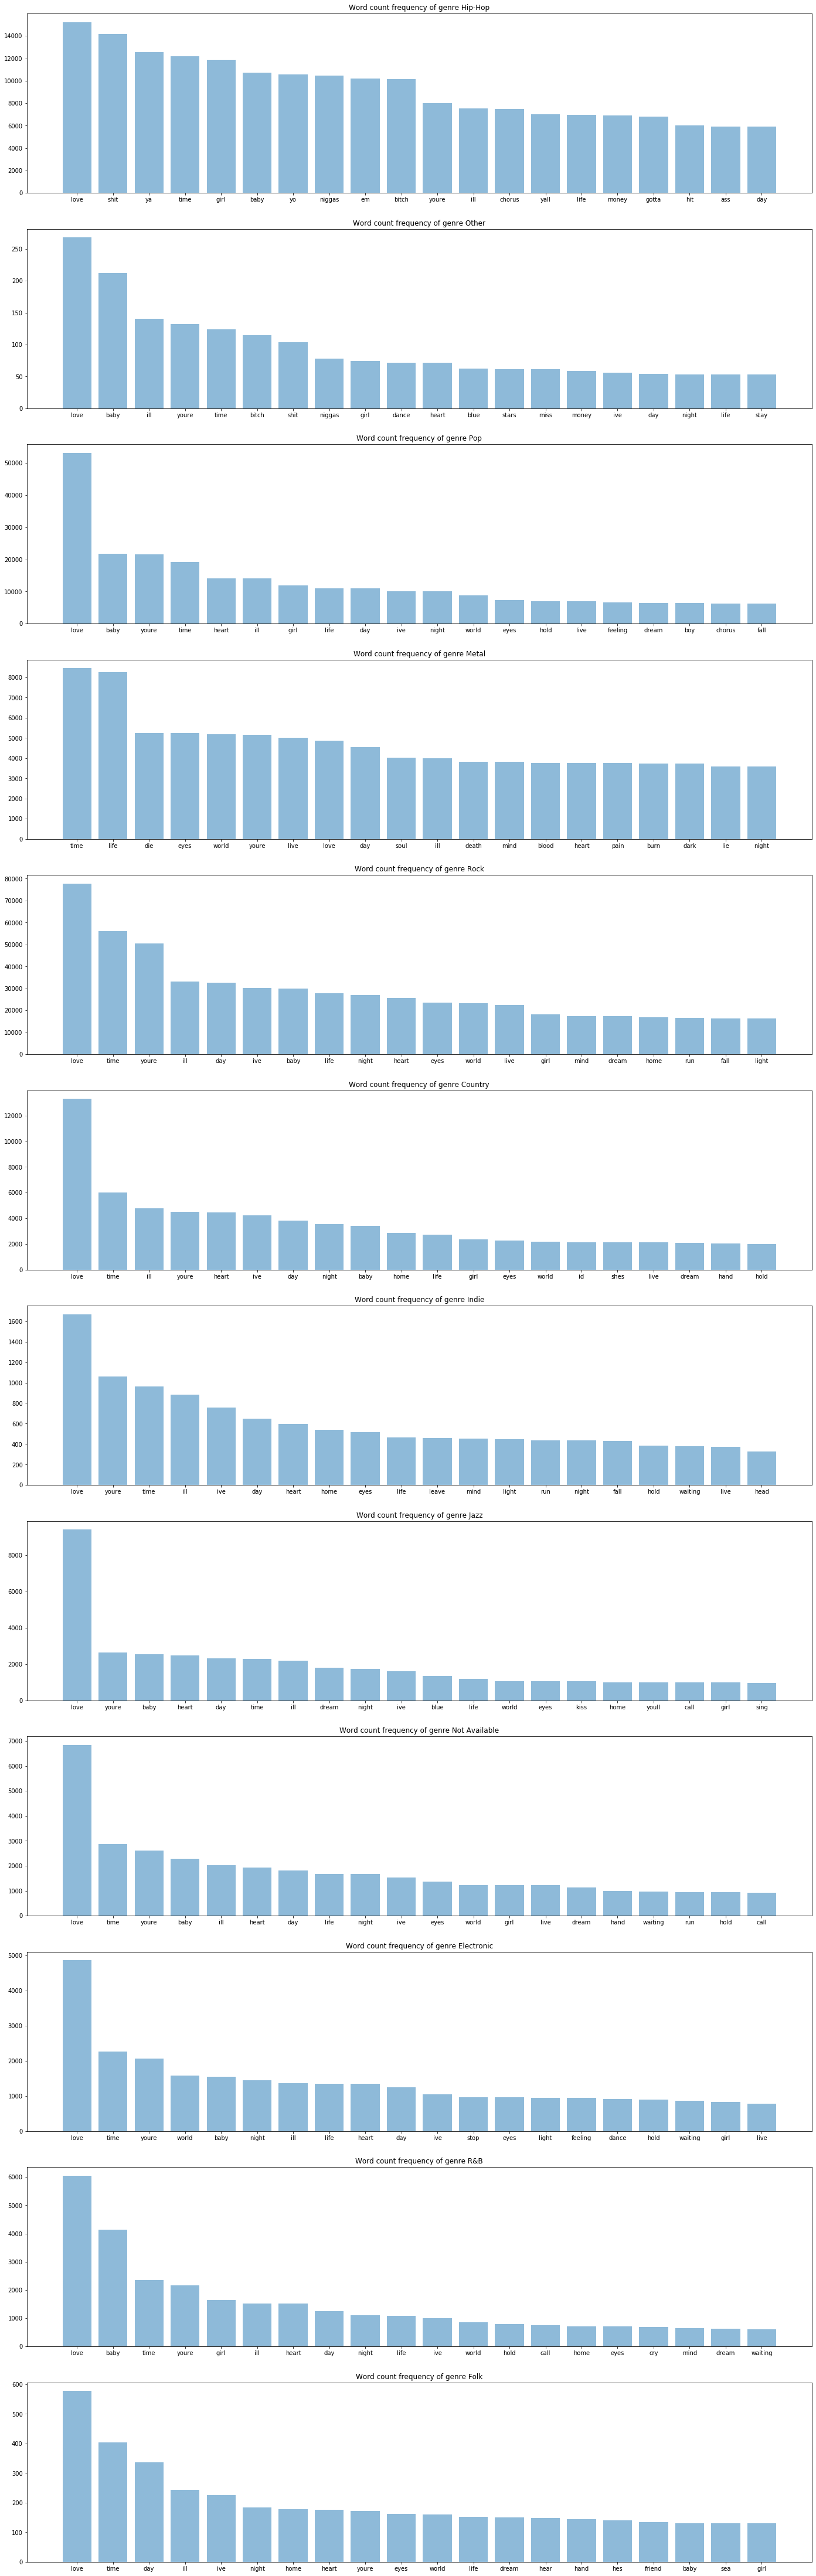

In [6]:
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 4)
fig.set_figheight(fig.get_figheight() * 20)
genres = dt_lyrics.genre.unique().tolist()
for idx, genre in enumerate(genres):
    tmp = pd.Series(' '.join(dt_lyrics[dt_lyrics.genre == genre].stemmedwords).split()).value_counts()[:20]
    plt.subplot(len(genres), 1, idx + 1)
    y_pos = np.arange(len(tmp.keys()))
    plt.bar(y_pos, tmp.values, align='center', alpha=0.5)
    plt.xticks(y_pos, tmp.keys())
    plt.title('Word count frequency of genre {}'.format(genre))

In [7]:
import spacy

# Load the spacy model that you have installed
nlp = spacy.load('en_core_web_md')

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
artists_df = dt_lyrics.groupby(['artist', 'genre'])['stemmedwords'].apply(' '.join).reset_index()

In [49]:
v = TfidfVectorizer()
x = v.fit_transform(artists_df.stemmedwords)

In [50]:
artist_tf_idf = x.toarray()

In [51]:
artist_tf_idf.argmax(axis=1)

array([106033,   9608,  18814, ...,  38997,  89207,  47619])

In [52]:
inverse_vocab = {v.vocabulary_[tmp]: tmp for tmp in v.vocabulary_}

In [53]:
inverse_vocab[18814]

'comedown'

In [72]:
from sklearn.decomposition import PCA

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 4)
fig.set_figheight(fig.get_figheight() * 4)

pca = PCA(n_components=2)
result = pca.fit_transform(artist_tf_idf)

artists = artists_df.artist.tolist()
genres = artists_df.genre.tolist()
genres_list = artists_df.genre.unique()
colors = {genre: np.random.rand(3,) for genre in genres_list}
for i, artist in enumerate(artists):
    plt.scatter(result[i, 0], result[i, 1], color=colors[genres[i]], label=genres[i])
#     plt.annotate(artist, xy=(result[i, 0], result[i, 1]))
plt.legend(genres)
plt.show()

In [73]:
def word2vec(text):
    doc = nlp(text)
    return doc.vector

sampled_artists = artists_df.sample(100, random_state=0)
lyric_vectors = [word2vec(x) for x in sampled_artists.stemmedwords]

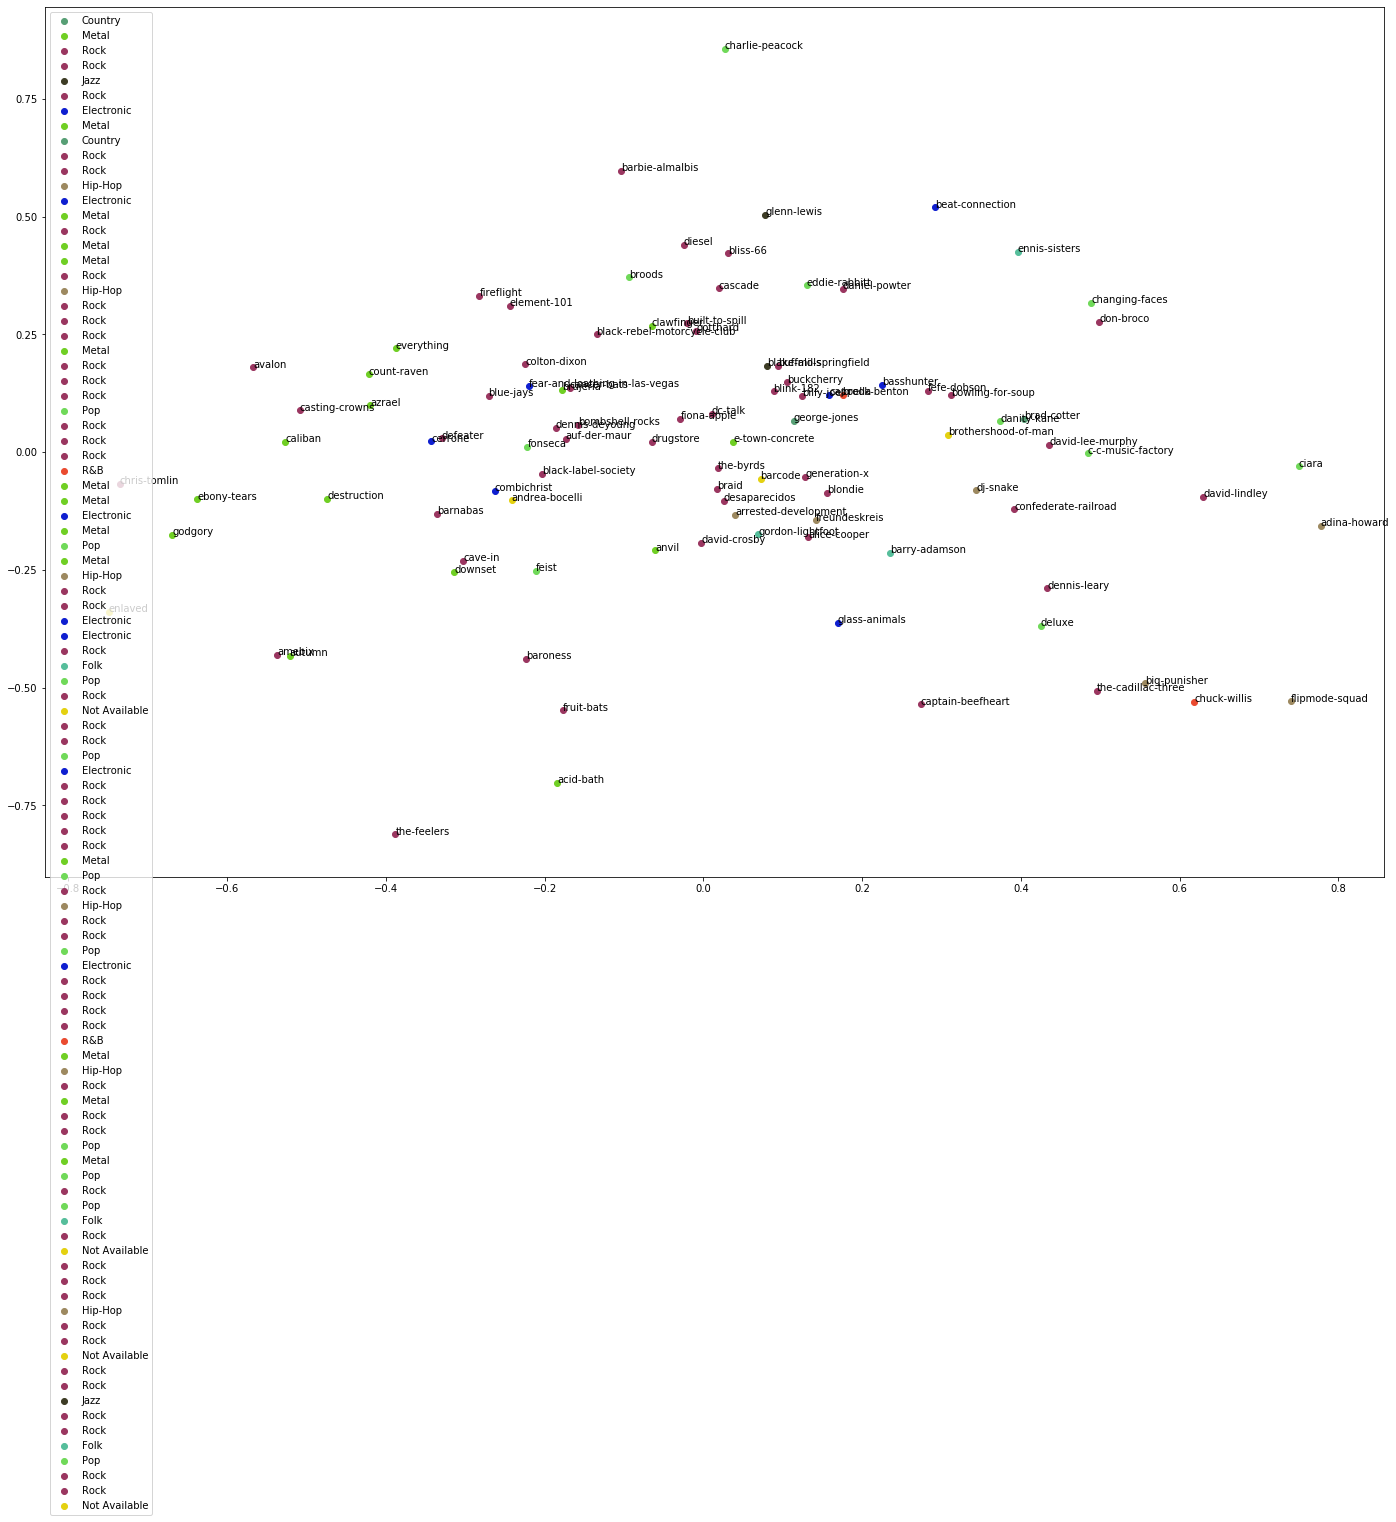

In [74]:
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 4)
fig.set_figheight(fig.get_figheight() * 4)

pca = PCA(n_components=2)
result = pca.fit_transform(lyric_vectors)

artists = sampled_artists.artist.tolist()
genres = sampled_artists.genre.tolist()
genres_list = sampled_artists.genre.unique()
colors = {genre: np.random.rand(3,) for genre in genres_list}
for i, artist in enumerate(artists):
    plt.scatter(result[i, 0], result[i, 1], color=colors[genres[i]], label=genres[i])
    plt.annotate(artist, xy=(result[i, 0], result[i, 1]))
plt.legend(genres)
plt.show()

### Each artist has only one genre!

In [47]:
grouped = dt_lyrics.groupby(['artist', 'genre']).count()
grouped.groupby(['artist']).count().max()

song            1
year            1
lyrics          1
id              1
stemmedwords    1
dtype: int64